In [24]:
import numpy as np 
import matplotlib as plt 
import matplotlib.pyplot as plt 
import pandas as pd 
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
from sklearn.cluster import KMeans
from sklearn import metrics
%matplotlib inline

In [16]:
df = pd.read_csv("online-retail.csv", delimiter= ';')
df.replace(np.nan, 0, inplace=True)
df.head(10)

,InvoiceNo,Description
0,C536383,SET OF 3 COLOURED FLYING DUCKS
1,C536391,PLASTERS IN TIN CIRCUS PARADE
2,C536391,PACK OF 12 PINK PAISLEY TISSUES
3,C536391,PACK OF 12 BLUE PAISLEY TISSUES
4,C536391,PACK OF 12 RED RETROSPOT TISSUES
5,C536391,CHICK GREY HOT WATER BOTTLE
6,C536391,PLASTERS IN TIN VINTAGE PAISLEY
7,C536391,PLASTERS IN TIN SKULLS
8,C536506,JAM MAKING SET WITH JARS
9,C536543,HAND WARMER RED RETROSPOT


In [17]:
agrupado = df.groupby('InvoiceNo')['Description'].apply(','.join).reset_index()
agrupado['Description'] = agrupado['Description'].str.replace(' ,',',')
agrupado = agrupado.Description.str.split(',', expand = True)
agrupado.head(10)
agrupado.to_csv("transaction.csv", index= False, header= False, sep= ',')

In [18]:
df = pd.read_csv("transaction.csv", delimiter= ',', header= None)
df.replace(np.nan, 0, inplace=True)
df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,SET OF 3 COLOURED FLYING DUCKS,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,PLASTERS IN TIN CIRCUS PARADE,PACK OF 12 PINK PAISLEY TISSUES,PACK OF 12 BLUE PAISLEY TISSUES,PACK OF 12 RED RETROSPOT TISSUES,CHICK GREY HOT WATER BOTTLE,PLASTERS IN TIN VINTAGE PAISLEY,PLASTERS IN TIN SKULLS,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,JAM MAKING SET WITH JARS,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,HAND WARMER RED RETROSPOT,CHARLOTTE BAG SUKI DESIGN,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3 HOOK HANGER MAGIC GARDEN,5 HOOK HANGER MAGIC TOADSTOOL,SET/5 RED RETROSPOT LID GLASS BOWLS,SET OF SALT AND PEPPER TOADSTOOLS,DELUXE SEWING KIT,TRIPLE PHOTO FRAME CORNICE,RETROSPOT PARTY BAG + STICKER SET,HOOK,1 HANGER,MAGIC GARDEN,...,0,0,0,0,0,0,0,0,0,0
5,SET/5 RED RETROSPOT LID GLASS BOWLS,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,SET 7 BABUSHKA NESTING BOXES,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3 TIER CAKE TIN GREEN AND CREAM,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,MIRRORED DISCO BALL,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,LIGHT GARLAND BUTTERFILES PINK,15CM CHRISTMAS GLASS BALL 20 LIGHTS,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
def removeZeros(lista):
    return list(filter(lambda x: x != 0, lista))

In [20]:
listao = []
for index, product in df.iterrows():
    lista = product.values.tolist()
    lista = removeZeros(lista)
    listao.append(lista)

listao[0:3]

[['SET OF 3 COLOURED  FLYING DUCKS'],
 ['PLASTERS IN TIN CIRCUS PARADE',
  'PACK OF 12 PINK PAISLEY TISSUES',
  'PACK OF 12 BLUE PAISLEY TISSUES',
  'PACK OF 12 RED RETROSPOT TISSUES',
  'CHICK GREY HOT WATER BOTTLE',
  'PLASTERS IN TIN VINTAGE PAISLEY',
  'PLASTERS IN TIN SKULLS'],
 ['JAM MAKING SET WITH JARS']]

In [21]:
TE = TransactionEncoder()
TE_AR = TE.fit(listao).transform(listao)
df = pd.DataFrame(TE_AR, columns=TE.columns_)
df.head(10)

,,1 HANGER,50'S CHRISTMAS GIFT BAG LARGE,BACK DOOR,BIRTHDAY CARD,BREAKFAST IN BED,DOLLY GIRL BEAKER,FRONT DOOR,GARAGE DESIGN,GLASS DOORS,...,ZINC FOLKART SLEIGH BELLS,ZINC HEARTS PLANT POT HOLDER,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,pack/12
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [31]:
valores_k = []
S =[]

for i in range(2, 15):
    kmeans = KMeans(n_clusters = i, n_init = 'auto').fit(df)
    valores_k.append(i)
    S.append(metrics.silhouette_score(df, kmeans.labels_))
    

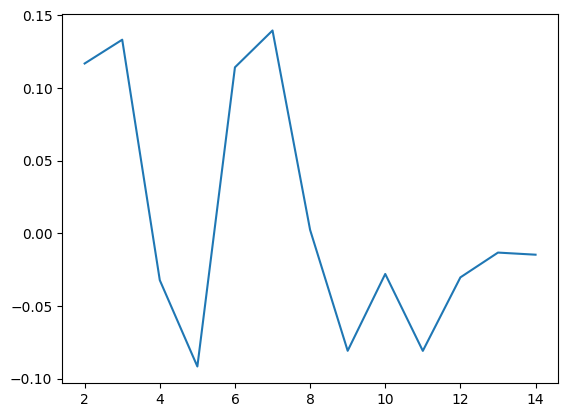

In [32]:
fig, ax = plt.subplots()
ax.plot(valores_k, S)
plt.show()

In [35]:
kmeans = KMeans(n_clusters = 4, n_init = 'auto').fit(df)
df['Cluster'] = kmeans.labels_
df.to_csv("AGRUPADO.csv", index= False, header= False, sep=',')

In [39]:
dfassoc = df.drop('Cluster', axis=1, inplace= True)

In [43]:
freq_itemset = apriori(df, min_support= 0.001, use_colnames= True)
freq_itemset.sort_values(by = ['support'], ascending = False).head(50)

,support,itemsets
376,0.059120,(Manual)
480,0.047720,(REGENCY CAKESTAND 3 TIER)
441,0.032874,(POSTAGE)
294,0.023065,(JAM MAKING SET WITH JARS)
591,0.013786,(STRAWBERRY CERAMIC TRINKET BOX)
447,0.012460,(RECIPE BOX PANTRY YELLOW DESIGN)
347,0.011400,(LUNCH BAG RED RETROSPOT)
309,0.011400,(JUMBO BAG RED RETROSPOT)
457,0.011135,(RED RETROSPOT CAKE STAND)
654,0.011135,(WHITE HANGING HEART T-LIGHT HOLDER)


In [47]:
regras = association_rules(freq_itemset, metric= "confidence", min_threshold= 0.4)
regras.sort_values(by= 'support', ascending= False).drop(['antecedent support', 'consequent support', 'leverage', 'conviction', 'zhangs_metric'] , axis = 1).head(50)

,antecedents,consequents,support,confidence,lift
43,(COFFEE),(SUGAR JARS),0.004507,0.629630,139.703704
44,(SUGAR JARS),(COFFEE),0.004507,1.000000,139.703704
63,(ROSES REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.004242,0.484848,43.544012
201,(WHITE TEA),"(COFFEE, SUGAR JARS)",0.003446,1.000000,221.882353
200,"(COFFEE, SUGAR JARS)",(WHITE TEA),0.003446,0.764706,221.882353
198,"(WHITE TEA, COFFEE)",(SUGAR JARS),0.003446,1.000000,221.882353
46,(COFFEE),(WHITE TEA),0.003446,0.481481,139.703704
45,(WHITE TEA),(COFFEE),0.003446,1.000000,139.703704
202,(COFFEE),"(WHITE TEA, SUGAR JARS)",0.003446,0.481481,139.703704
199,"(WHITE TEA, SUGAR JARS)",(COFFEE),0.003446,1.000000,139.703704
